In [2]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout, Dense
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

from keras.utils import np_utils
import itertools
import warnings 

warnings.filterwarnings('ignore') 
%matplotlib inline

In [3]:
data = np.load('ORL_faces.npz') 

In [4]:
x_train = data['trainX']
x_test = data['testX']

In [5]:
# normalize every image
x_train= np.array(x_train,dtype= 'float32')/255
x_test = np.array(x_test,dtype='float32')/255

In [6]:
y_train= data['trainY']
y_test= data['testY']

In [7]:
print('x_train shape',x_train.shape )
print('y_train shape',y_train.shape )
print('x_test shape',x_test.shape )
print('y_test shape',y_test.shape )

x_train shape (240, 10304)
y_train shape (240,)
x_test shape (160, 10304)
y_test shape (160,)


In [8]:
#Split the dataset
X_train,X_valid, Y_train, Y_valid = train_test_split(x_train, y_train, test_size= 0.05, random_state=123)

In [10]:
# change the images size to equal sizes
batch_size=512
im_shape=(112, 92, 1)

X_train = X_train.reshape(X_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
X_valid = X_valid.reshape(X_valid.shape[0], *im_shape)

print('x_train shape: {}'.format(y_train.shape[0]))
print('x_test shape: {}'.format(y_test.shape))

x_train shape: 240
x_test shape: (160,)


In [11]:
#Build a CNN model 
Model_CNN = Sequential()
Model_CNN.add(Conv2D(filters=36, kernel_size=7, activation='relu', input_shape= im_shape))
Model_CNN.add(MaxPooling2D(pool_size=2))
Model_CNN.add(Conv2D(filters=54, kernel_size=5, activation='relu', input_shape= im_shape))
Model_CNN.add(MaxPooling2D(pool_size=2))
Model_CNN.add(Flatten())
Model_CNN.add(Dense(2024, activation='relu'))
Model_CNN.add(Dropout(0.5))
Model_CNN.add(Dense(1024, activation='relu'))
Model_CNN.add(Dropout(0.5))
Model_CNN.add(Dense(512, activation='relu'))
Model_CNN.add(Dropout(0.5))
Model_CNN.add(Dense(20, activation='softmax'))

In [12]:
Model_CNN.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)

In [13]:
Model_CNN.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 106, 86, 36)       1800      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 53, 43, 36)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 49, 39, 54)        48654     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 19, 54)        0         
_________________________________________________________________
flatten (Flatten)            (None, 24624)             0         
_________________________________________________________________
dense (Dense)                (None, 2024)              49841000  
_________________________________________________________________
dropout (Dropout)            (None, 2024)              0

In [14]:
#Train the model
Model= Model_CNN.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=300, batch_size=32)

Epoch 1/300
8/8 [==============================] - 22s 960ms/step - loss: 3.0740 - accuracy: 0.0517 - val_loss: 2.9861 - val_accuracy: 0.0500
Epoch 2/300
8/8 [==============================] - 7s 886ms/step - loss: 3.0277 - accuracy: 0.0405 - val_loss: 2.9832 - val_accuracy: 0.0500
Epoch 3/300
8/8 [==============================] - 7s 881ms/step - loss: 3.0342 - accuracy: 0.0437 - val_loss: 2.9826 - val_accuracy: 0.0500
Epoch 4/300
8/8 [==============================] - 7s 885ms/step - loss: 2.9933 - accuracy: 0.0579 - val_loss: 2.9803 - val_accuracy: 0.0500
Epoch 5/300
8/8 [==============================] - 7s 881ms/step - loss: 2.9825 - accuracy: 0.0687 - val_loss: 2.9741 - val_accuracy: 0.1000
Epoch 6/300
8/8 [==============================] - 7s 879ms/step - loss: 2.9781 - accuracy: 0.0668 - val_loss: 2.9673 - val_accuracy: 0.1625
Epoch 7/300
8/8 [==============================] - 7s 881ms/step - loss: 2.9668 - accuracy: 0.1343 - val_loss: 2.9571 - val_accuracy: 0.0938
Epoch 8/300


In [15]:
Scores = Model_CNN.evaluate( x_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (Scores[1]*100))
#print('Loss Value: '.format  Scores[0])

print('Loss Value: {}'.format(np.around(Scores[0],2)))

Accuracy: 95.63%
Loss Value: 0.46


In [16]:
Model.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

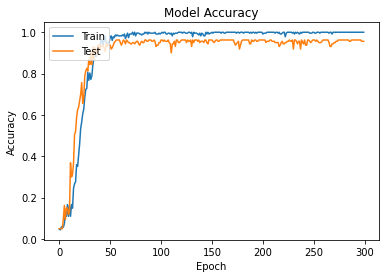

In [17]:
# Plot the Model for Accuracy
plt.plot(Model.history['accuracy'])
plt.plot(Model.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

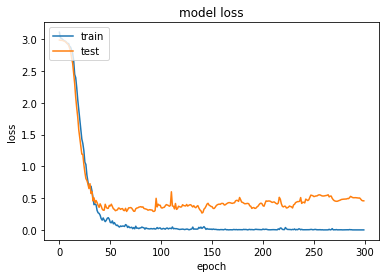

In [18]:
# Plot the Model  for loss
plt.plot(Model.history['loss'])
plt.plot(Model.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
predicted = Model_CNN.predict(x_test)
y = Model_CNN.predict_classes(x_test)
Acc = accuracy_score(y_test, y)
print('Accuracy: %.2f%%' % (Acc*100))


Accuracy: 95.62%


In [20]:
predict_4= Model_CNN.predict(x_test[:4])
print(predict_4)
print( y_test[:4])

[[9.88804281e-01 3.32317832e-05 5.25117343e-07 5.36152633e-08
  8.32488567e-08 4.42473237e-07 9.55297037e-06 5.40004930e-06
  1.50203991e-08 2.33143318e-08 5.48793139e-07 3.01247439e-07
  1.09794337e-05 1.69505415e-06 4.28150815e-05 2.58610654e-03
  3.12664597e-05 3.78439813e-06 8.46863911e-03 2.02231178e-07]
 [9.71035302e-01 3.77108087e-08 6.41209308e-09 2.06767270e-10
  4.26896157e-10 9.76971490e-11 1.43160825e-08 3.40001116e-09
  4.04437421e-12 3.13751195e-12 3.53091667e-09 1.49736099e-10
  9.82726874e-07 1.09476677e-08 4.80402118e-09 2.89615449e-02
  1.76104944e-08 1.76368985e-06 4.70411720e-07 4.72143658e-10]
 [9.97023046e-01 5.27244301e-05 7.38803146e-06 4.58529485e-06
  1.74192028e-05 5.56221756e-04 1.56311889e-05 1.32085279e-05
  1.19125453e-07 7.12273106e-07 1.76791698e-04 8.71326938e-06
  1.17493875e-03 1.94420616e-04 1.13907583e-04 4.05479106e-04
  7.65180266e-06 9.66747830e-05 1.27111271e-04 3.18258731e-06]
 [9.96221900e-01 1.50474416e-05 1.41388099e-07 7.03695093e-07
  5.0

In [21]:
Matrix = confusion_matrix(y_test, y)
Matrix

array([[8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 2, 0, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

In [22]:
y_test1 = np_utils.to_categorical(y_test, 20)
y_test1

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [23]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape= im_shape, activation='relu'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(20, activation='softmax'))

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer=Adam(lr=0.0001),
    metrics=['accuracy']
)
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_24 (Conv2D)           (None, 112, 92, 32)       320       
_________________________________________________________________
dropout_22 (Dropout)         (None, 112, 92, 32)       0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 112, 92, 32)       9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 56, 46, 32)        0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 56, 46, 64)        18496     
_________________________________________________________________
dropout_23 (Dropout)         (None, 56, 46, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 56, 46, 64)       

In [24]:
Model= model.fit(X_train, Y_train, validation_data=(x_test, y_test), epochs=300, batch_size=32)

Epoch 1/300
8/8 [==============================] - 21s 2s/step - loss: 3.0027 - accuracy: 0.0543 - val_loss: 2.9910 - val_accuracy: 0.0625
Epoch 2/300
8/8 [==============================] - 19s 2s/step - loss: 2.9772 - accuracy: 0.0425 - val_loss: 2.9885 - val_accuracy: 0.0500
Epoch 3/300
8/8 [==============================] - 18s 2s/step - loss: 2.9735 - accuracy: 0.0453 - val_loss: 2.9861 - val_accuracy: 0.0625
Epoch 4/300
8/8 [==============================] - 18s 2s/step - loss: 2.9596 - accuracy: 0.0674 - val_loss: 2.9795 - val_accuracy: 0.1000
Epoch 5/300
8/8 [==============================] - 18s 2s/step - loss: 2.9517 - accuracy: 0.0588 - val_loss: 2.9708 - val_accuracy: 0.0500
Epoch 6/300
8/8 [==============================] - 19s 2s/step - loss: 2.9137 - accuracy: 0.1018 - val_loss: 2.9520 - val_accuracy: 0.1312
Epoch 7/300
8/8 [==============================] - 19s 2s/step - loss: 2.8915 - accuracy: 0.1321 - val_loss: 2.9094 - val_accuracy: 0.0875
Epoch 8/300
8/8 [==========

In [26]:

Scores = model.evaluate( x_test, y_test, verbose=0)

print("Accuracy: %.2f%%" % (Scores[1]*100))
#print('Loss Value: '.format  Scores[0])

print('Loss Value: {}'.format(np.around(Scores[0],2)))

Accuracy: 96.25%
Loss Value: 0.37
